# Import Packages + Data brut

In [40]:
import pandas as pd
import math
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sys
import os

# Ajoute le chemin du dossier parent à sys.path
notebook_dir = os.path.abspath('..')  # Dossier parent de "notebook/"
sys.path.append(notebook_dir)

from fonctions.importation import *
from fonctions.traitement_data import *

import warnings
warnings.filterwarnings("ignore")

In [41]:
df = etl(r"..\data\data_raw")

**************************************************
Démarrage du processus d'importation

Importation du fichier HousePrice_Bronx_County.csv
Importation du fichier HousePrice_Brooklyn.csv
Importation du fichier HousePrice_Brooklyn_Heights.csv
Importation du fichier HousePrice_Coney_Island.csv
Importation du fichier HousePrice_Dumbo.csv
Importation du fichier HousePrice_East_Bronx.csv
Importation du fichier HousePrice_Flushing.csv
Importation du fichier HousePrice_Fort_Hamilton.csv
Importation du fichier HousePrice_Jackson_Heights.csv
Importation du fichier HousePrice_Kings_County.csv
Importation du fichier HousePrice_Manhattan.csv
Importation du fichier HousePrice_New_York.csv
Importation du fichier HousePrice_New_York_County.csv
Importation du fichier HousePrice_Queens.csv
Importation du fichier HousePrice_Queens_County.csv
Importation du fichier HousePrice_Rego_Park.csv
Importation du fichier HousePrice_Richmond_County.csv
Importation du fichier HousePrice_Riverdale.csv
Importation du

# Analyse Data bruts

In [42]:
# Liste des colonnes numériques
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Liste des colonnes non numériques
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

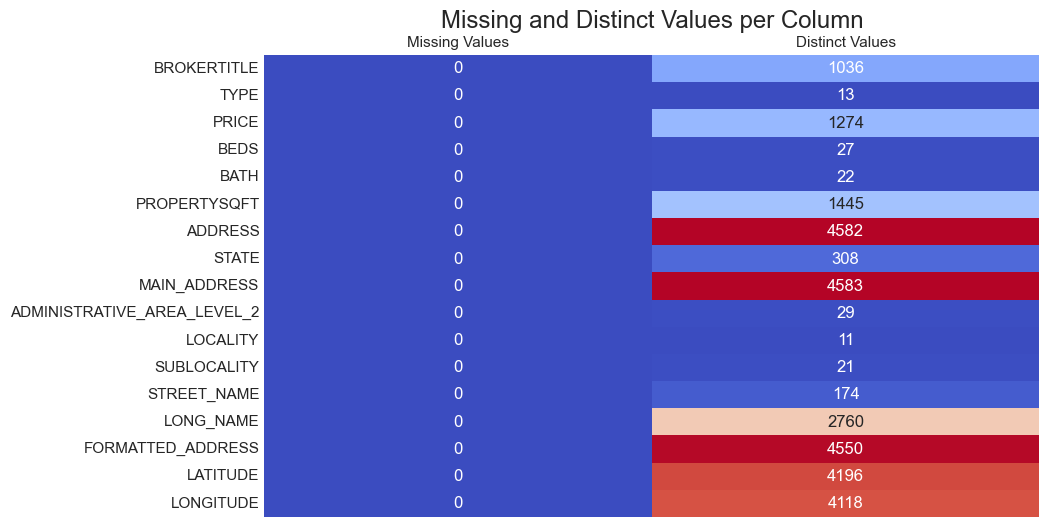

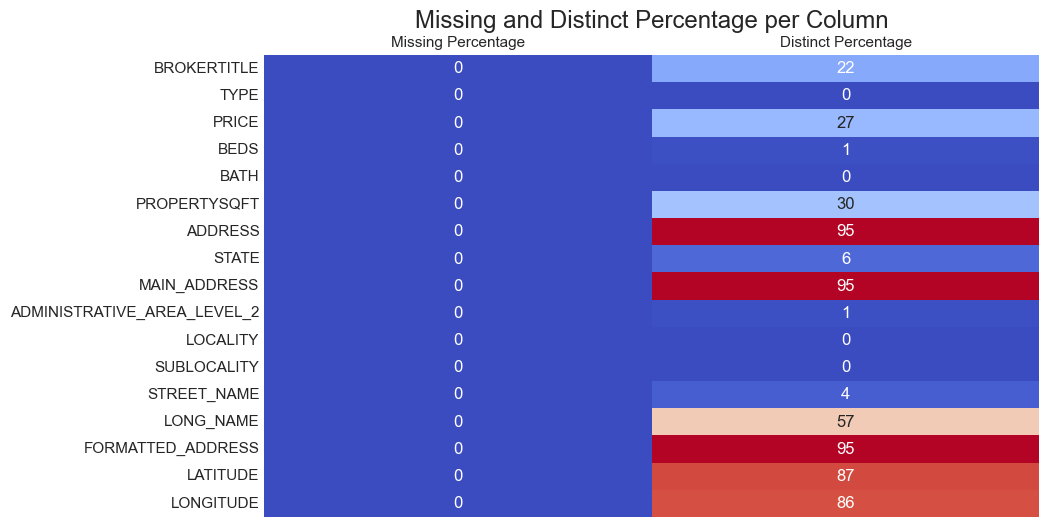

In [43]:
analyze_and_plot(df)

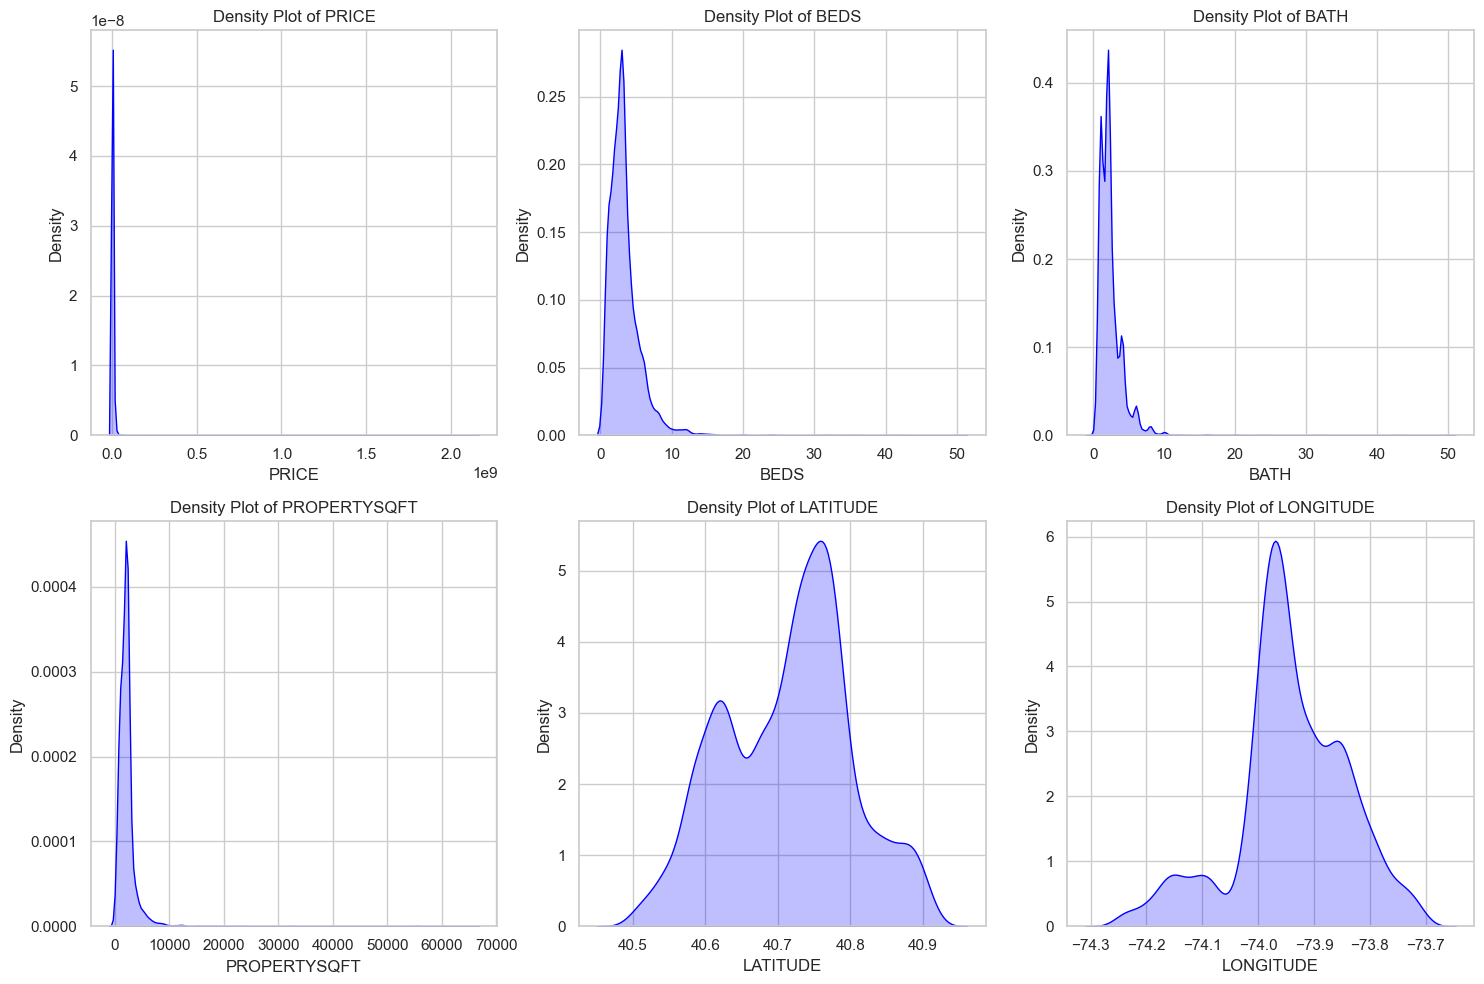

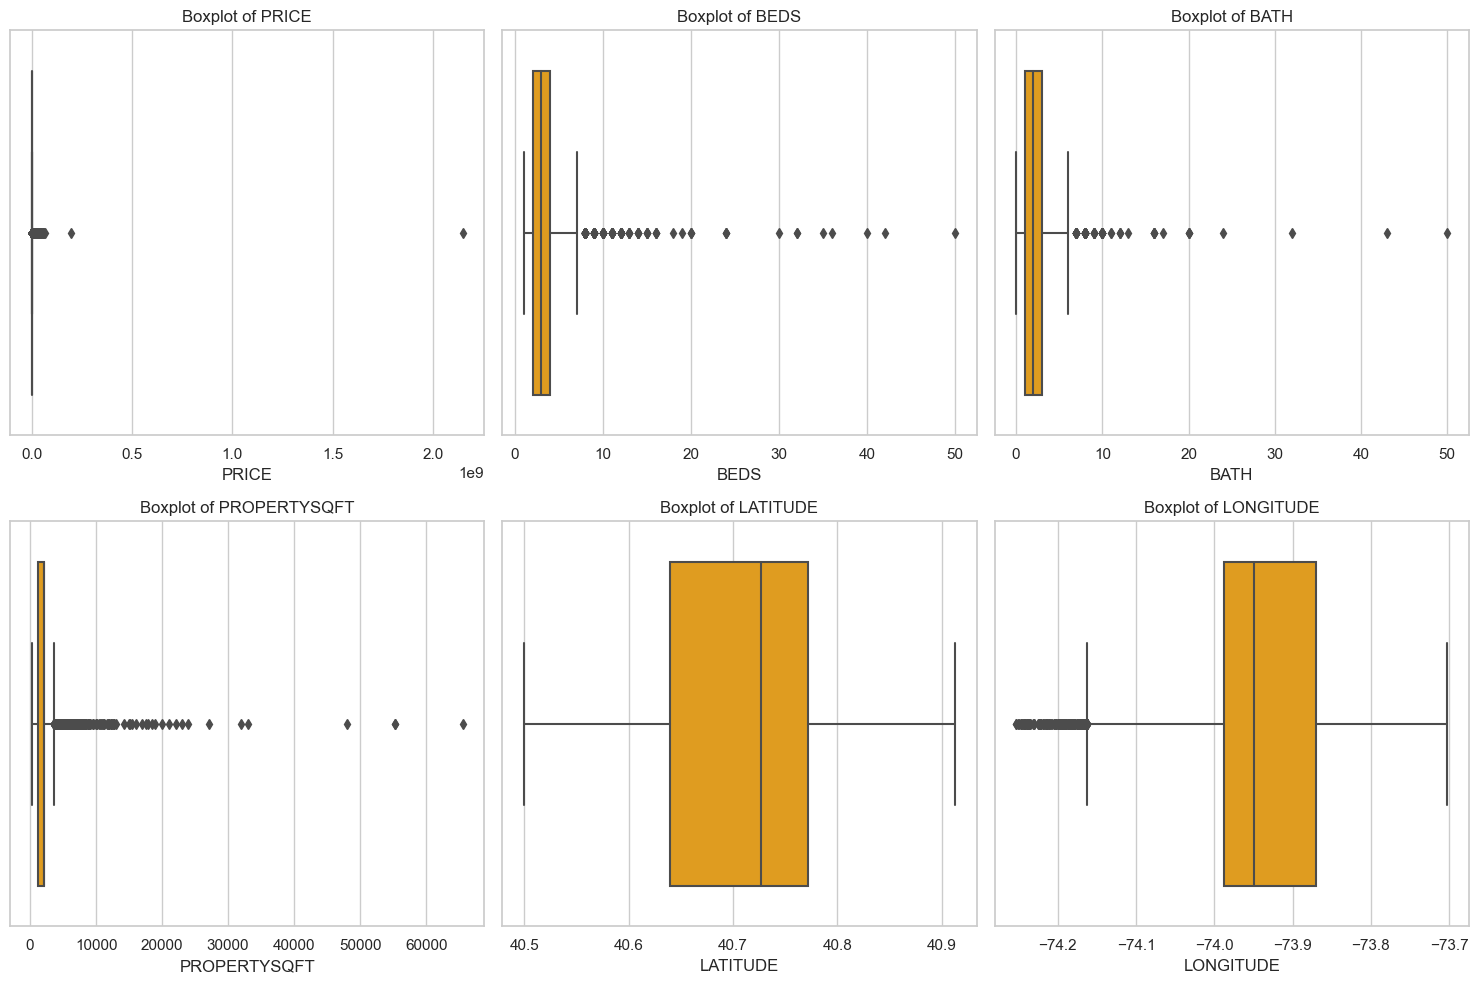

In [44]:
# Configuration de l'affichage
sns.set(style="whitegrid")
# Calcul du nombre de lignes et de colonnes pour le sous-graphique
num_cols = 3  # Par exemple, on fixe 3 colonnes
num_rows = math.ceil(len(numeric_columns) / num_cols)

plt.figure(figsize=(15, 5 * num_rows))

# Création de graphiques pour chaque colonne numérique avec courbe de densité
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(df[column], fill=True, color='blue')
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Boîtes à moustaches pour les mêmes colonnes
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column], color='orange')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

# Traitement Data

In [45]:
df_clean = df.copy()
df_clean.drop(['BROKERTITLE','LATITUDE', 'LONGITUDE'], axis=1, inplace=True)

In [46]:
def assign_borough(row):
    if any(x in ["Manhattan", "New York County"] for x in [row["LOCALITY"], row["SUBLOCALITY"], row["STREET_NAME"]]):
        return "Manhattan"
    elif any(x in ["Brooklyn", "Kings County"] for x in [row["LOCALITY"], row["SUBLOCALITY"], row["STREET_NAME"]]):
        return "Brooklyn"
    elif any(x in ["Queens", "Queens County"] for x in [row["LOCALITY"], row["SUBLOCALITY"], row["STREET_NAME"]]):
        return "Queens"
    elif any(x in ["Bronx", "Bronx County"] for x in [row["LOCALITY"], row["SUBLOCALITY"], row["STREET_NAME"]]):
        return "Bronx"
    elif any(x in ["Staten Island", "Richmond County"] for x in [row["LOCALITY"], row["SUBLOCALITY"], row["STREET_NAME"]]):
        return "Staten Island"
    else:
        return "autre"

# Application de la fonction pour créer une nouvelle colonne
df_clean["BOROUGH"] = df_clean.apply(assign_borough, axis=1)

In [47]:
# Liste des colonnes numériques
numeric_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns
# Liste des colonnes non numériques
non_numeric_columns = df_clean.select_dtypes(exclude=['float64', 'int64']).columns
print(non_numeric_columns)

Index(['TYPE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS',
       'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME',
       'LONG_NAME', 'FORMATTED_ADDRESS', 'BOROUGH'],
      dtype='object')


# Analyse Data Post-Traitement

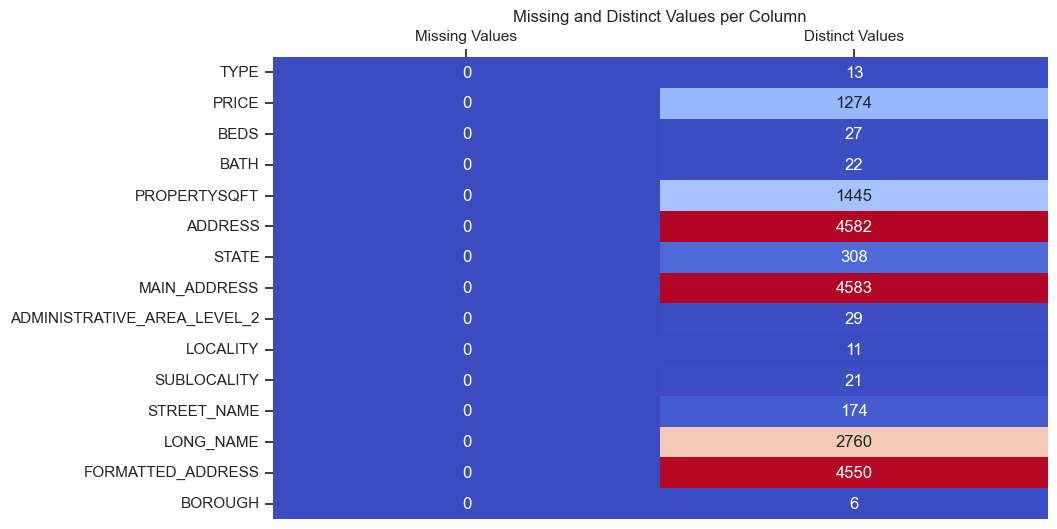

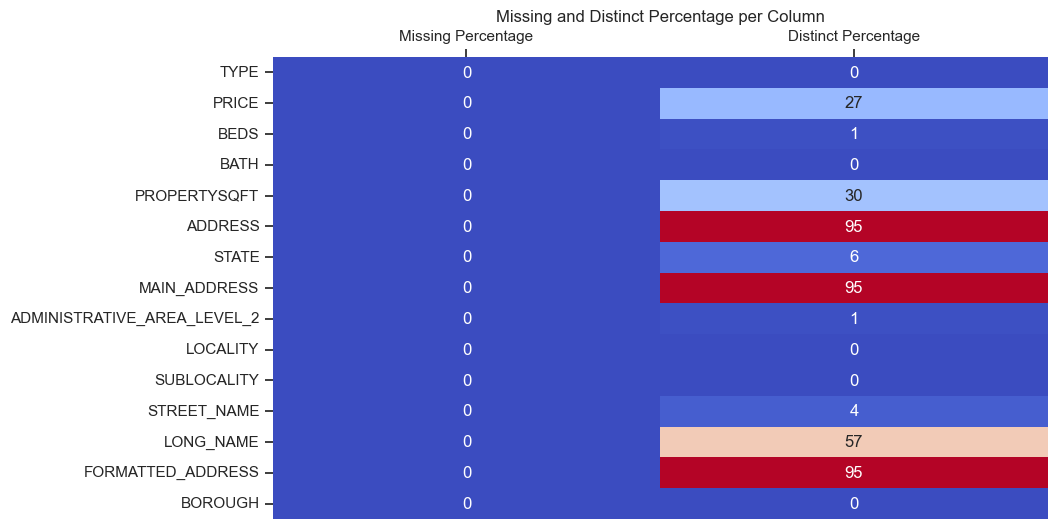

In [48]:
analyze_and_plot(df_clean)

In [49]:
adapted_non_numeric_columns = ['BOROUGH', 'BROKERTITLE', 'TYPE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS',
       'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME',
       'LONG_NAME', 'FORMATTED_ADDRESS', ]

TYPE
Co-op for sale                1450
House for sale                1012
Condo for sale                 891
Multi-family home for sale     727
Townhouse for sale             299
Pending                        243
Contingent                      88
Land for sale                   49
For sale                        20
Foreclosure                     14
Condop for sale                  5
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64


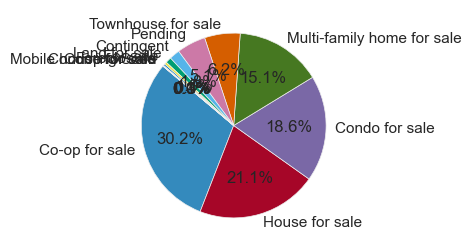

ADDRESS
2619 Shore Pkwy              3
856 Washington Ave Apt 6C    3
79-28 68th Ave               2
147-20 76th Rd               2
414 61st St Apt 4A           2
                            ..
305 W 55th St Apt 2A         1
531 Main St Apt 520          1
28 W 87th St Apt 4A          1
48 W 138th St Apt 6F         1
3015 Riverdale Ave Apt 2A    1
Name: count, Length: 4582, dtype: int64


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000024943B33910> (for post_execute):


KeyboardInterrupt: 

In [50]:
for column in non_numeric_columns :
    plt.style.use("bmh")
    prop_mod_cah = df[column].value_counts() # Calcul les proportions d'appartitions des modalités dans la variable
    print(prop_mod_cah)
    plt.figure(figsize=(3, 3))
    plt.pie(prop_mod_cah, labels=prop_mod_cah.index, autopct='%1.1f%%', startangle=140)
    plt.show()